# Classifiers evaluation

http://scikit-learn.org/stable/modules/multiclass.html

In [1]:
from scipy.io import arff
import pandas as pd
import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### ARFF file loading

In [2]:
arff_data = arff.loadarff('/Applications/weka-3-8-1/data/iris.arff')
df = pd.DataFrame(arff_data[0])
df.head()

sepallength sepalwidth petallength petalwidth class
0 5.1 3.5 1.4 0.2 b'Iris-setosa'
1 4.9 3.0 1.4 0.2 b'Iris-setosa'
2 4.7 3.2 1.3 0.2 b'Iris-setosa'
3 4.6 3.1 1.5 0.2 b'Iris-setosa'
4 5.0 3.6 1.4 0.2 b'Iris-setosa'

### Sample сonversion

In [3]:
target = df['class'] 
data = df.drop(columns = ['class'])
target = target.astype('str')

### Confusion matrix plot function

http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
 

In [4]:
def plot_confusion_matrix(matrix, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
 """
 This function prints and plots the confusion matrix.
 """
 if normalize:
     matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
 else:
     print('Confusion matrix, without normalization')

 pyplot.imshow(matrix, interpolation='nearest', cmap=cmap)
 pyplot.title(title)
 pyplot.colorbar()
 tick_marks = np.arange(len(classes))
 pyplot.xticks(tick_marks, classes, rotation=45)
 pyplot.yticks(tick_marks, classes)

 fmt = '.2f' if normalize else 'd'
 thresh = matrix.max() / 2.
 for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
     plt.text(j, i, format(matrix[i, j], fmt),
     horizontalalignment="center",
     color="white" if matrix[i, j] > thresh else "black")

 pyplot.tight_layout()
 pyplot.ylabel('True label')
 pyplot.xlabel('Predicted label')


# Baseline

http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics


Accuracy = 0.333
 precision recall f1-score support

 b'Iris-setosa' 0.33 1.00 0.50 50
b'Iris-versicolor' 0.00 0.00 0.00 50
 b'Iris-virginica' 0.00 0.00 0.00 50

 avg / total 0.11 0.33 0.17 150

Confusion matrix, without normalization


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
 'precision', 'predicted', average, warn_for)


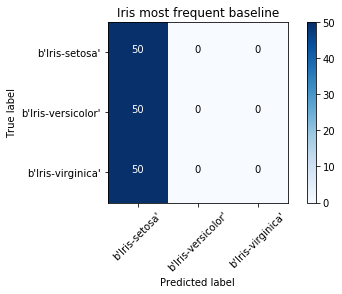

In [5]:
from sklearn import dummy, metrics

baseline = dummy.DummyClassifier(strategy='most_frequent')
baseline.fit (data, target)
base_predictions = baseline.predict(data)

accuracy = metrics.accuracy_score(target, base_predictions)
print ("Accuracy = {:.3f}".format(accuracy))

print(metrics.classification_report(target, base_predictions))

plot_confusion_matrix(metrics.confusion_matrix(target, base_predictions), 
 classes = target.unique(), 
 title='Iris most frequent baseline')


# Train-test spliting

http://scikit-learn.org/stable/modules/cross_validation.html

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split


In [6]:
from sklearn import model_selection as ms

train_data, test_data, train_labels, test_labels = ms.train_test_split(data, target, test_size = 0.3)
print ('Train data size: {} instances \nTest data size: {} instances'.format(len(train_data), len(test_data)))

Train data size: 105 instances 
Test data size: 45 instances


### Decision tree training

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [7]:
from sklearn import tree

iris_split_tree_model = tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=2)
iris_split_tree_model.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
 max_features=None, max_leaf_nodes=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=2, min_samples_split=2,
 min_weight_fraction_leaf=0.0, presort=False, random_state=1,
 splitter='best')

In [10]:
def print_tree (tree): 
 print ('Tree depth: {} \n'.format(tree.tree_.max_depth))
 n_nodes = tree.tree_.node_count
 children_left = tree.tree_.children_left
 children_right = tree.tree_.children_right
 feature = tree.tree_.feature
 threshold = tree.tree_.threshold


 # The tree structure can be traversed to compute various properties such
 # as the depth of each node and whether or not it is a leaf.
 node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
 is_leaves = np.zeros(shape=n_nodes, dtype=bool)
 stack = [(0, -1)] # seed is the root node id and its parent depth
 while len(stack) > 0:
 node_id, parent_depth = stack.pop()
 node_depth[node_id] = parent_depth + 1

 # If we have a test node
 if (children_left[node_id] != children_right[node_id]):
 stack.append((children_left[node_id], parent_depth + 1))
 stack.append((children_right[node_id], parent_depth + 1))
 else:
 is_leaves[node_id] = True

 print("The binary tree structure has %s nodes and has "
 "the following tree structure:"
 % n_nodes)
 for i in range(n_nodes):
 if is_leaves[i]:
 print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
 else:
 print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
 "node %s."
 % (node_depth[i] * "\t",
 i,
 children_left[i],
 feature[i],
 threshold[i],
 children_right[i],
 ))

In [11]:
print_tree (iris_split_tree_model)

Tree depth: 4 

The binary tree structure has 11 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 3] <= 0.699999988079 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 3] <= 1.75 else to node 8.
		node=3 test node: go to node 4 if X[:, 2] <= 4.94999980927 else to node 5.
			node=4 leaf node.
			node=5 test node: go to node 6 if X[:, 3] <= 1.54999995232 else to node 7.
				node=6 leaf node.
				node=7 leaf node.
		node=8 test node: go to node 9 if X[:, 2] <= 4.85000038147 else to node 10.
			node=9 leaf node.
			node=10 leaf node.


### Evaluate train-test tree classifier


Accuracy = 0.956
 precision recall f1-score support

 b'Iris-setosa' 1.00 1.00 1.00 19
b'Iris-versicolor' 0.86 1.00 0.92 12
 b'Iris-virginica' 1.00 0.86 0.92 14

 avg / total 0.96 0.96 0.96 45

Confusion matrix, without normalization


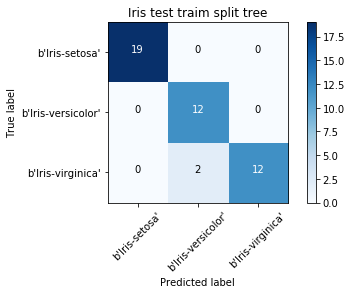

In [12]:
split_tree_predictions = iris_split_tree_model.predict(test_data)

split_tree_accuracy = metrics.accuracy_score(test_labels, split_tree_predictions)

print ("Accuracy = {:.3f}".format(split_tree_accuracy))

print(metrics.classification_report(test_labels, split_tree_predictions))

plot_confusion_matrix(metrics.confusion_matrix(test_labels, split_tree_predictions), 
 classes = test_labels.unique(), 
 title='Iris test traim split tree')


# Cross validation

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

http://scikit-learn.org/stable/modules/model_evaluation.html#multimetric-scoring



### Use scoring 

In [13]:
iris_cv_tree_model = tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=2)

folds = 3

acc_scorer = metrics.make_scorer(metrics.accuracy_score)
recall_scorer = metrics.make_scorer(metrics.recall_score, average='weighted')
prec_scorer = metrics.make_scorer(metrics.precision_score, average='weighted')
f1_scorer = metrics.make_scorer(metrics.f1_score, average='weighted')

scoring = {'accuracy': acc_scorer, 
 'recall': recall_scorer, 
 'precision' : prec_scorer,
 'f1': f1_scorer}

cv_tree_model_scores = ms.cross_validate (iris_cv_tree_model,
 data,
 target,
 scoring=scoring,
 cv=folds,
 return_train_score=True)

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

print('Evaluation results for {} folds'.format(folds))

for (k,v) in cv_tree_model_scores .items():
 print(('{}: {}').format(k,v))



Evaluation results for 3 folds
fit_time: [ 0.002 0.001 0.002]
score_time: [ 0.007 0.004 0.003]
test_accuracy: [ 0.980 0.902 0.979]
train_accuracy: [ 0.980 0.990 0.971]
test_recall: [ 0.980 0.902 0.979]
train_recall: [ 0.980 0.990 0.971]
test_precision: [ 0.981 0.903 0.980]
train_precision: [ 0.980 0.990 0.973]
test_f1: [ 0.980 0.902 0.979]
train_f1: [ 0.980 0.990 0.971]


### Get tree cross-validation predictions

Accuracy = 0.953
 precision recall f1-score support

 b'Iris-setosa' 1.00 1.00 1.00 50
b'Iris-versicolor' 0.91 0.96 0.93 50
 b'Iris-virginica' 0.96 0.90 0.93 50

 avg / total 0.95 0.95 0.95 150

Confusion matrix, without normalization


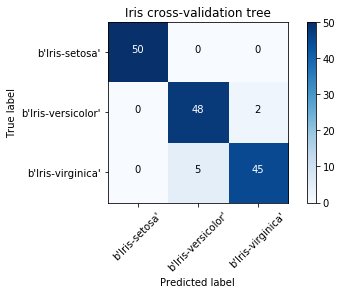

In [14]:
iris_cv_predict_tree_model = tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=2)

cv_tree_predictions = ms.cross_val_predict(iris_cv_predict_tree_model, data, target)

cv_tree_accuracy = metrics.accuracy_score(target, cv_tree_predictions)
print ("Accuracy = {:.3f}".format(cv_tree_accuracy))

print(metrics.classification_report(target, cv_tree_predictions))

plot_confusion_matrix(metrics.confusion_matrix(target, cv_tree_predictions), 
 classes = test_labels.unique(), 
 title='Iris cross-validation tree')

# Grid search for Support vector machine

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

http://scikit-learn.org/stable/modules/svm.html

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [16]:
train_data, test_data, train_labels, test_labels = ms.train_test_split(data, target, test_size = 0.2)

In [17]:
from sklearn import svm

folds = 3

acc_scorer = metrics.make_scorer(metrics.accuracy_score)

hyper_params_svc = [{'kernel': ['rbf'],
 'gamma': [1e-3, 1e-4],
 'C': [1, 10, 100, 1000]},
 {'kernel': ['linear'], 
 'C': [1, 10, 100, 1000]}]

classifier_svc = svm.SVC()

svm_grid = ms.GridSearchCV(
 classifier_svc, 
 hyper_params_svc, # parameters to tune via cross validation
 refit=True, # fit using all available data at the end, on the best found param combination
 scoring=acc_scorer, 
 cv=ms.StratifiedKFold(n_splits=folds)
)

svm_grid_best_model = svm_grid.fit(train_data, train_labels)

print("Best hyper-parameters for accuracy:")
print(svm_grid_best_model.best_params_)


Best hyper-parameters for accuracy:
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


Accuracy = 0.933
 precision recall f1-score support

 b'Iris-setosa' 1.00 1.00 1.00 10
b'Iris-versicolor' 0.92 0.92 0.92 13
 b'Iris-virginica' 0.86 0.86 0.86 7

 avg / total 0.93 0.93 0.93 30

Confusion matrix, without normalization


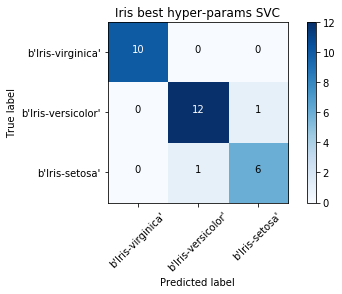

In [18]:
predictions_svm = svm_grid_best_model.predict(test_data)

svm_grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions_svm)
print ("Accuracy = {:.3f}".format(svm_grid_best_model_accuracy))

print (metrics.classification_report(test_labels, predictions_svm))

plot_confusion_matrix(metrics.confusion_matrix(test_labels, predictions_svm), 
 classes = test_labels.unique(), 
 title='Iris best hyper-params SVC')
